<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>The Sledge Hack: Ind vs Aus Cricket Hackathon</h1>
</div>

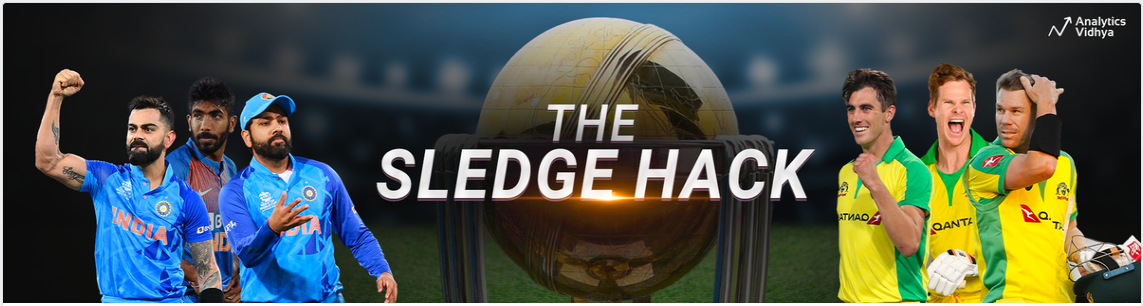

**Author:-** Aniket B. Barphe
    
**LinkedIn Profile:-** https://www.linkedin.com/in/aniiketbarphe/
        
**Platform:-** Cricket Hackathon AnalyticsVidhya (29-09-2023 09:00 AM to 08-10-2023 02:00 PM)
    
**Problem Statement:-** Build a machine learning-based approach to make precise predictions regarding the runs scored and wickets taken by each player

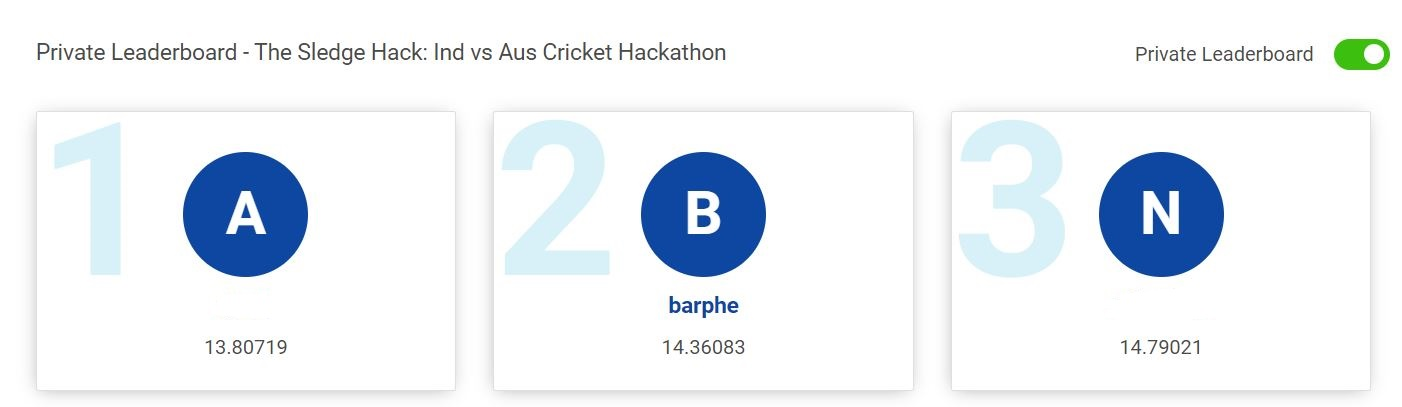

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [4]:
# Data manipulation
import scipy
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os
import math

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Model Evaluations
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# print module versions for reproducibility
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))

# User Defined Functions
# a) Label Encoding   
def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])

NumPy version 1.21.5
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.0.1


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Historical Player and Team Performance Data recieved from AnalyticsVidhya" data into "av_data" Variable 
- Read & Load "Open Source Dataset retrieve from ESPNCrickInfo" into "additional_data" Variable
- Read & Load "Submission Data recieved from AnalyticsVidhya" into "submission" Variable


In [5]:
av_data = pd.read_csv (r'C:\Users\PC\Pictures\AV\Crick_Hack23\IndVsAus-Sep2023\data_zpyYWs0.csv')
additional_data = pd.read_csv (r'C:\Users\PC\Pictures\AV\Crick_Hack23\IndVsAus-Sep2023\IND-AUS-Player-ESPN-DATA-29092023.csv')
submission = pd.read_csv (r'C:\Users\PC\Pictures\AV\Crick_Hack23\IndVsAus-Sep2023\sample_submission_Gk1Mne1.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>ESPNCrickInfo Feature/s Definitions</h2>
</div>

### <span style="color:black">Here are the definitions for the features available in ESPNCrickInfo data:-</span>

#### <span style="color:orange">a) **PLAYING_ROLE**:-</span> 

Role played by a player within the team.

#### <span style="color:orange">b) **BOWLING_STYLE**:-</span> 

The player's bowling technique or bowling method.

#### <span style="color:orange">c) **BATTING_STYLE**:-</span> 

The player's style of batting.

#### <span style="color:orange">d) **DOB**:-</span> 

The player's date of birth.

#### <span style="color:orange">e) **FIELDING_POSITION**:-</span> 

The player's fielding position.

#### <span style="color:orange">f) **ODI_Bat_NotOut**:-</span> 

Frequency of a player's innings where they were not dismissed while batting in One Day Internationals (ODIs).

#### <span style="color:orange">g) **ODI_Highest_Bat_Inning_Score**:-</span> 

The player's highest individual batting score in a One Day International (ODI) match.

#### <span style="color:orange">h) **ODI_Bat_Avg**:-</span> 

The player's One Day International (ODI) batting average.

#### <span style="color:orange">i) **ODI_Bat_SR**:-</span> 

The ODI batting strike rate of the player.

#### <span style="color:orange">j) **ODI_Hundred_Scored**:-</span> 

The count of centuries achieved by the player in One Day Internationals (ODIs).

#### <span style="color:orange">k) **ODI_Fifty_Scored**:-</span> 

The count of half-centuries achieved by the player in One Day Internationals (ODIs).

#### <span style="color:orange">l) **ODI_Boundary_Four**:-</span> 

The count of boundaries where the player scored four runs in One Day International (ODI) matches.

#### <span style="color:orange">m) **OBI_Boundary_Six**:-</span> 

The count of sixes scored by the player in One Day Internationals (ODIs).

#### <span style="color:orange">n) **ODI_Bowl_Avg**:-</span> 

The ODI Bowling Average of the Player.

#### <span style="color:orange">o) **ODI_Economy_Rate**:-</span> 

The ODI Bowler's Economy Rate.

#### <span style="color:orange">p) **ODI_Bowl_SR**:-</span> 

Player's One Day International (ODI) Bowling Strike Rate.

#### <span style="color:orange">q) **ODI_4Wt_in_Inn**:-</span> 

The frequency of a bowler taking 4 wickets in a single inning during a One Day International (ODI) match.

#### <span style="color:orange">r) **ODI_5Wt_in_Inn**:-</span> 

The count of instances where a bowler has taken 5 wickets in a single ODI inning.

#### <span style="color:orange">s) **ODI_Inn_Bat_Field**:-</span> 

In ODI (One Day International) cricket, the count of innings in which a player participated, either as a batsman or a fielder.


#### <span style="color:green">In addition to the definitions mentioned above,below are the details regarding the website from which additional player data was retrieved and the date on which this supplementary information was extracted.</span>

##### <span style="color:red">a) **Website**:- www.espncricinfo.com</span> 

##### <span style="color:red">b) **Data Extracted On**:- <span style="color:black">29 Sept 2023</span> </span>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of AnalyticsVidhya Data including Categorical Variable
- Statistical Insight of Dataset retrieve from ESPNCrickInfo including Categorical Variable
- Check Null Entries in AnalyticsVidhya Data 
- Check Null Entries in Dataset retrieve from ESPNCrickInfo 
- Check Unique Entries in AnalyticsVidhya Data 
- Check Unique Entries in Dataset retrieve from ESPNCrickInfo

In [6]:
print("Data Types in AnalyticsVidhya Data:-\n")
print(av_data.info(),'\n')

print("Shape of AnalyticsVidhya Data:-\n")
print(av_data.shape,'\n')

print('-------------'*9)

print("\nData Types in Dataset retrieve from ESPNCrickInfo:-\n")
print(additional_data.info(),'\n')

print("\nShape of Dataset retrieve from ESPNCrickInfo:-\n")
print(additional_data.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in AnalyticsVidhya Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575 entries, 0 to 2574
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   player_id      2575 non-null   int64 
 1   player_name    2575 non-null   object
 2   runs_scored    2575 non-null   object
 3   wickets        2575 non-null   object
 4   runs_conceded  2575 non-null   object
 5   catches        2575 non-null   object
 6   stumpings      2575 non-null   object
 7   match_date     2575 non-null   object
 8   opposition     2575 non-null   object
 9   match_id       2575 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 201.3+ KB
None 

Shape of AnalyticsVidhya Data:-

(2575, 10) 

---------------------------------------------------------------------------------------------------------------------

Data Types in Dataset retrieve from ESPNCrickInfo:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 

In [7]:
print("About AnalyticsVidhya Data:-\n")
print(av_data.head(),'\n')
print('-------------'*9)

print("\nAbout Dataset retrieve from ESPNCrickInfo:-\n")
print(additional_data.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)

About AnalyticsVidhya Data:-

   player_id   player_name runs_scored wickets runs_conceded catches  \
0          1   Pat Cummins         DNB       3            28       0   
1          2   Steve Smith         DNB       -             -       0   
2         10   Mitch Marsh          8*       1            19       1   
3         13  David Warner          20       -             -       0   
4          1   Pat Cummins         11*       1            73       0   

  stumpings match_date                opposition  match_id  
0         0  19-Oct-11  v South Africa Centurion         1  
1         0  19-Oct-11  v South Africa Centurion         1  
2         0  19-Oct-11  v South Africa Centurion         1  
3         0  19-Oct-11  v South Africa Centurion         1  
4         0  23-Oct-11   v South Africa Gqeberha         2   

---------------------------------------------------------------------------------------------------------------------

About Dataset retrieve from ESPNCrickInfo:-

   pl

In [8]:
print("About AnalyticsVidhya Data:-\n")
print(av_data.tail(),'\n')
print('-------------'*9)

print("\nAbout Dataset retrieve from ESPNCrickInfo:-\n")
print(additional_data.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About AnalyticsVidhya Data:-

      player_id      player_name runs_scored wickets runs_conceded catches  \
2570         22  Ravindra Jadeja         DNB       3            35       0   
2571         22  Ravindra Jadeja         DNB       2            41       0   
2572         22  Ravindra Jadeja          23       0            44       1   
2573         22  Ravindra Jadeja          57       0            36       0   
2574         22  Ravindra Jadeja         DNB       4            32       0   

     stumpings match_date             opposition  match_id  
2570         0  28-Oct-09     v Australia Nagpur       553  
2571         0  31-Oct-09      v Australia Delhi       554  
2572         0  05-Nov-09  v Australia Hyderabad       555  
2573         0  08-Nov-09   v Australia Guwahati       556  
2574         0  21-Dec-09    v Sri Lanka Cuttack       557   

---------------------------------------------------------------------------------------------------------------------

About Dataset 

In [9]:
av_data.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id
count,2575.000000,2575,2575,2575,2575,2575,2575,2575,2575,2575.000000
unique,NaN,30,266,8,89,6,4,532,266,NaN
top,NaN,Virat Kohli,DNB,-,-,0,0,17-Mar-23,v Sri Lanka Colombo (RPS),NaN
freq,NaN,281,556,1099,1099,1718,2540,22,96,NaN
mean,15.926214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.114951
std,7.663574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.410523
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.000000
50%,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.000000
75%,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.000000


In [10]:
additional_data.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,player_id,player_id_For_ESPN,player_name_AV_DATA,player_name_ESPN_DATA,PLAYING_ROLE,BOWLING_STYLE,BATTING_STYLE,DOB,FIELDING_POSITION,ODI_Bat_NotOut,ODI_Highest_Bat_Inning_Score,ODI_Bat_Avg,ODI_Bat_SR,ODI_Hundred_Scored,ODI_Fifty_Scored,ODI_Boundary_Four,OBI_Boundary_Six,ODI_Bowl_Avg,ODI_Economy_Rate,ODI_Bowl_SR,ODI_4Wt_in_Inn,ODI_5Wt_in_Inn,ODI_Inn_Bat_Field,Data_Extracted_on,Source
count,30.000000,30.000000,30,30,30,30,30,30,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30,30
unique,NaN,NaN,30,30,9,13,2,30,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,NaN,NaN,Pat Cummins,PJ Cummins,Bowler,Right arm Offbreak,Right hand Bat,08-May-93,Not_Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-Sep-23,www.espncricinfo.com
freq,NaN,NaN,1,1,9,5,22,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,30
mean,15.500000,15.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.033333,98.200000,29.867000,89.372333,4.500000,11.166667,192.733333,41.866667,32.596000,4.480000,34.600000,2.233333,0.800000,66.266667,NaN,NaN
std,8.803408,8.803408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.366871,66.183861,16.279228,17.335545,10.417988,15.811570,285.053526,60.441327,35.084455,2.371511,33.678152,3.380301,1.749877,62.886287,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.000000,6.160000,40.210000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,NaN,NaN
25%,8.250000,8.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,50.000000,16.657500,85.180000,0.000000,1.000000,25.250000,6.250000,5.002500,4.742500,6.150000,0.000000,0.000000,26.500000,NaN,NaN
50%,15.500000,15.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,90.500000,32.865000,90.960000,0.000000,6.500000,96.000000,18.000000,28.520000,5.320000,31.800000,0.000000,0.000000,46.500000,NaN,NaN
75%,22.750000,22.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,140.500000,43.545000,99.102500,2.750000,14.750000,199.500000,50.500000,36.925000,5.690000,41.700000,3.750000,1.000000,64.500000,NaN,NaN


In [11]:
print("Checking Null entries & their Percentage in AnalyticsVidhya Data:-\n\n")
missing_val_av_data=pd.DataFrame(zip(av_data.isnull().sum()
                                   ,av_data.isnull().sum()*100/len(av_data))
                               ,columns=['Missing Values','Percentage Missing Values']
                                 ,index=av_data.columns)
missing_val_av_data

Checking Null entries & their Percentage in AnalyticsVidhya Data:-




,Missing Values,Percentage Missing Values
player_id,0,0.0
player_name,0,0.0
runs_scored,0,0.0
wickets,0,0.0
runs_conceded,0,0.0
catches,0,0.0
stumpings,0,0.0
match_date,0,0.0
opposition,0,0.0
match_id,0,0.0


In [12]:
print("Checking Null entries & their Percentage in Dataset retrieve from ESPNCrickInfo:-\n\n")
missing_val_additional_data=pd.DataFrame(zip(additional_data.isnull().sum()
                                   ,additional_data.isnull().sum()*100/len(additional_data))
                               ,columns=['Missing Values','Percentage Missing Values']
                                 ,index=additional_data.columns)
missing_val_additional_data

Checking Null entries & their Percentage in Dataset retrieve from ESPNCrickInfo:-




,Missing Values,Percentage Missing Values
player_id,0,0.0
player_id_For_ESPN,0,0.0
player_name_AV_DATA,0,0.0
player_name_ESPN_DATA,0,0.0
PLAYING_ROLE,0,0.0
BOWLING_STYLE,0,0.0
BATTING_STYLE,0,0.0
DOB,0,0.0
FIELDING_POSITION,0,0.0
ODI_Bat_NotOut,0,0.0


In [13]:
# Checking Unique entries in AnalyticsVidhya Data
listItem = []
for col in av_data.columns :
    listItem.append( [col, av_data[col].nunique(), av_data[col].unique()])

av_data_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in AnalyticsVidhya Data are :-\n\n")
print('-------------'*9)
av_data_unique

Unique entries in AnalyticsVidhya Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,player_id,30,"[1, 2, 10, 13, 11, 15, 8, 16, 19, 27, 28, 12, ..."
1,player_name,30,"[Pat Cummins, Steve Smith, Mitch Marsh, David ..."
2,runs_scored,266,"[DNB, 8*, 20, 11*, 26, 74, 6*, 10, TDNB, 4, 8,..."
3,wickets,8,"[3, -, 1, 2, 0, 4, 6, 5]"
4,runs_conceded,89,"[28, -, 19, 73, 24, 49, 11, 53, 61, 27, 43, 40..."
5,catches,6,"[0, 1, 2, 4, 3, -]"
6,stumpings,4,"[0, 2, 1, -]"
7,match_date,532,"[19-Oct-11, 23-Oct-11, 28-Oct-11, 23-Jun-12, 2..."
8,opposition,266,"[v South Africa Centurion, v South Africa Gqeb..."
9,match_id,557,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [14]:
# Checking Unique entries in Dataset retrieve from ESPNCrickInfo
listItem = []
for col in additional_data.columns :
    listItem.append( [col, additional_data[col].nunique(), additional_data[col].unique()])

additional_data_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Dataset retrieve from ESPNCrickInfo are :-\n\n")
print('-------------'*9)
additional_data_unique

Unique entries in Dataset retrieve from ESPNCrickInfo are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,player_id,30,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,player_id_For_ESPN,30,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,player_name_AV_DATA,30,"[Pat Cummins, Steve Smith, Alex Carey, Josh In..."
3,player_name_ESPN_DATA,30,"[PJ Cummins, SPD Smith, AT Carey, JP Inglis, S..."
4,PLAYING_ROLE,9,"[Bowler, Middle order Batter, Wicketkeeper Bat..."
5,BOWLING_STYLE,13,"[Right arm Fast, Legbreak Googly, Not_Applicab..."
6,BATTING_STYLE,2,"[Right hand Bat, Left hand Bat]"
7,DOB,30,"[08-May-93, 02-Jun-89, 27-Aug-91, 04-Mar-95, 2..."
8,FIELDING_POSITION,3,"[Not_Applicable, Wicketkeeper, Wicketkeeper Ba..."
9,ODI_Bat_NotOut,22,"[17, 15, 11, 0, 1, 2, 7, 21, 5, 10, 14, 6, 24,..."


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing</h2>
</div>

In [15]:
# Step 1- Remove "*" from Number
av_data['runs_scored'] = av_data['runs_scored'].str.split('*').str[0]

# Step 2- Replace "DNB" and "TDNB" with Space in "runs_scored" column
av_data['runs_scored'] = av_data['runs_scored'].replace(['DNB', 'TDNB'], ' ')

# Step 3- Replace "-" by "Zero"
av_data = av_data.replace('-',0)

# Step 4- Extract "Opponent_Team_Name" and "Match_Venue" from "opposition" Column
av_data['Opponent_Team_Name'] = av_data['opposition'].apply(lambda x: ''.join(str(x).split(' ')[:-1]))
av_data['Match_Venue'] = av_data['opposition'].apply(lambda x: str(x).split(' ')[-1])

# Step 5- Remove extra 'v' prefix from "Country_Name" in "Opponent_Team_Name" Column
av_data['Opponent_Team_Name'] = av_data['Opponent_Team_Name'].str.replace('v', '').str.strip()

# Step 6- Convert below features to numeric data type
av_data['runs_scored'] = pd.to_numeric(av_data['runs_scored'], errors='coerce')
av_data['wickets'] = pd.to_numeric(av_data['wickets'], errors='coerce')
av_data['runs_conceded'] = pd.to_numeric(av_data['runs_conceded'], errors='coerce')
av_data['catches'] = pd.to_numeric(av_data['catches'], errors='coerce')
av_data['stumpings'] = pd.to_numeric(av_data['stumpings'], errors='coerce')

# Step 7- Convert the 'Date' column to a datetime object
av_data['match_date'] = pd.to_datetime(av_data['match_date'])

# Step 8- Sort the DataFrame by date
av_data.sort_values(by='match_date', inplace=True)

# Step 9- Set the date as the index
av_data.set_index('match_date', inplace=True)

# Step 10- Integrate External Dataset into AnalyticsVidhya Dataset
final_data = pd.merge(av_data,additional_data
                          ,on= 'player_id',how = 'left')

# Step 11- Derive Feature (Catches per innings as a Fielder)
final_data['ct_by_Inn'] = final_data['catches'] / final_data['ODI_Inn_Bat_Field']

# Step 12- Derive Feature (Stumpings per Innings as a Fielder)
final_data['stump_by_Inn'] = final_data['stumpings'] / final_data['ODI_Inn_Bat_Field']

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Imputation of Null Values in DataSet</h2>
</div>

In [16]:
final_data['runs_scored'] = final_data['runs_scored'].apply(lambda x: 0 if pd.isna(x) or x is None else x)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in DataSet</h2>
</div>


In [17]:
final_data.isnull().sum()

player_id                       0
player_name                     0
runs_scored                     0
wickets                         0
runs_conceded                   0
catches                         0
stumpings                       0
opposition                      0
match_id                        0
Opponent_Team_Name              0
Match_Venue                     0
player_id_For_ESPN              0
player_name_AV_DATA             0
player_name_ESPN_DATA           0
PLAYING_ROLE                    0
BOWLING_STYLE                   0
BATTING_STYLE                   0
DOB                             0
FIELDING_POSITION               0
ODI_Bat_NotOut                  0
ODI_Highest_Bat_Inning_Score    0
ODI_Bat_Avg                     0
ODI_Bat_SR                      0
ODI_Hundred_Scored              0
ODI_Fifty_Scored                0
ODI_Boundary_Four               0
OBI_Boundary_Six                0
ODI_Bowl_Avg                    0
ODI_Economy_Rate                0
ODI_Bowl_SR   

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from DataSet</h2>
</div>

In [18]:
drop_columns = ['player_id_For_ESPN','player_name_AV_DATA'
                ,'player_name_ESPN_DATA','Data_Extracted_on'
                ,'runs_conceded','stumpings','catches'
                ,'opposition', 'match_id','Source'
                ,'player_name','DOB'
                ,'FIELDING_POSITION','PLAYING_ROLE'
                , 'BOWLING_STYLE','BATTING_STYLE'
                ,'ODI_Bat_NotOut','Opponent_Team_Name'
                ,'Match_Venue']

final_data2 = final_data.drop(drop_columns,axis=1)
print('-------------'*9)
print("Shape of Final Dataset used for Modeling:-\n\n",final_data2.shape)
print('-------------'*9)
Final_Features = list(final_data2.columns)
print("List of Features used for Model Building:-\n\n",Final_Features)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
Shape of Final Dataset used for Modeling:-

 (2575, 18)
---------------------------------------------------------------------------------------------------------------------
List of Features used for Model Building:-

 ['player_id', 'runs_scored', 'wickets', 'ODI_Highest_Bat_Inning_Score', 'ODI_Bat_Avg', 'ODI_Bat_SR', 'ODI_Hundred_Scored', 'ODI_Fifty_Scored', 'ODI_Boundary_Four', 'OBI_Boundary_Six', 'ODI_Bowl_Avg', 'ODI_Economy_Rate', 'ODI_Bowl_SR', 'ODI_4Wt_in_Inn', 'ODI_5Wt_in_Inn', 'ODI_Inn_Bat_Field', 'ct_by_Inn', 'stump_by_Inn']
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about Data

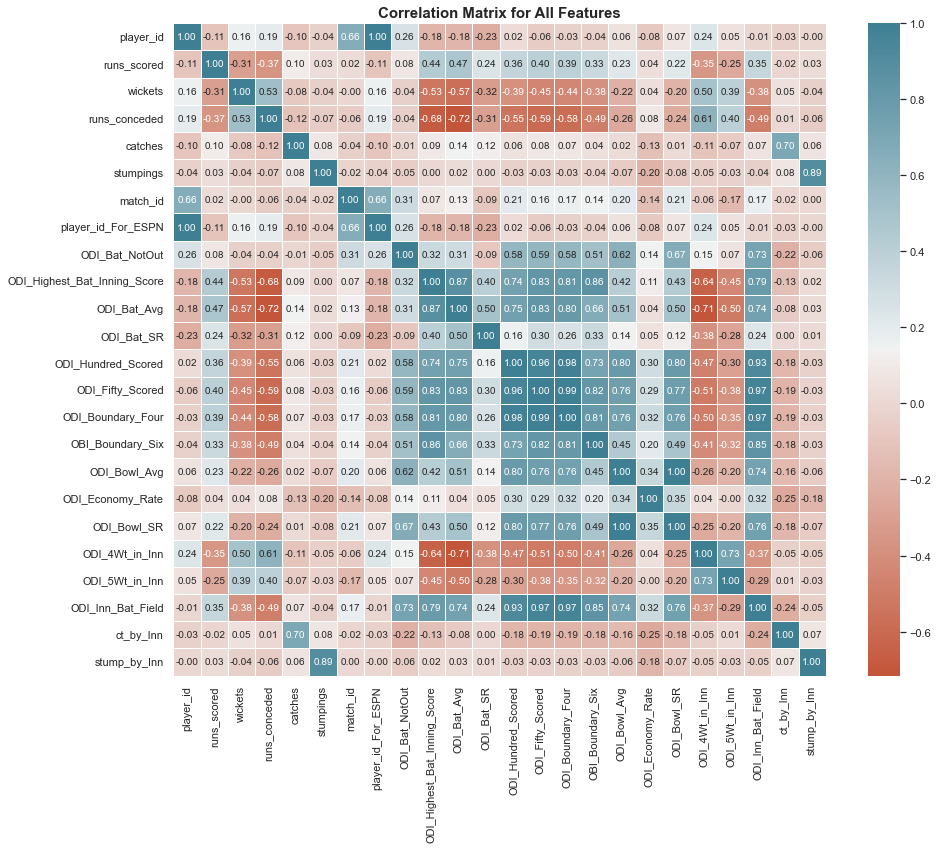

In [19]:
# Correlation matrix for all features
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = final_data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix for All Features', size=15, weight='bold');

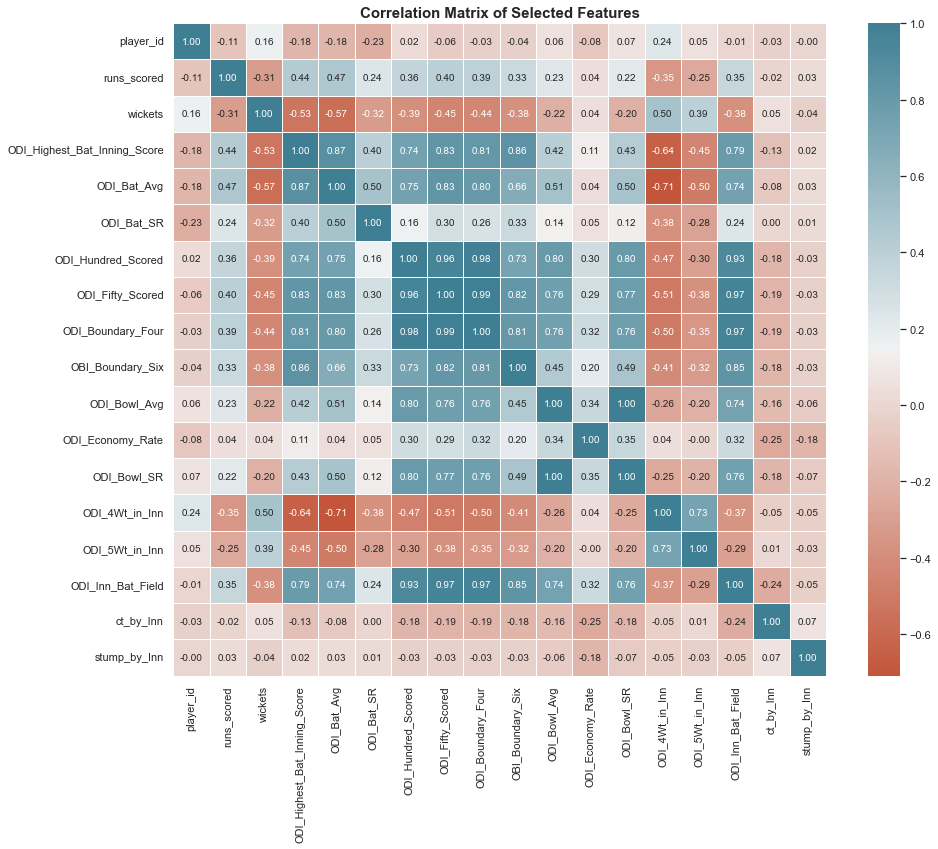

In [20]:
# Correlation matrix of selected features
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = final_data2.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix of Selected Features', size=15, weight='bold');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in DataSet</h2>
</div>


In [21]:
final_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2574
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   player_id                     2575 non-null   int64  
 1   runs_scored                   2575 non-null   float64
 2   wickets                       2575 non-null   int64  
 3   ODI_Highest_Bat_Inning_Score  2575 non-null   int64  
 4   ODI_Bat_Avg                   2575 non-null   float64
 5   ODI_Bat_SR                    2575 non-null   float64
 6   ODI_Hundred_Scored            2575 non-null   int64  
 7   ODI_Fifty_Scored              2575 non-null   int64  
 8   ODI_Boundary_Four             2575 non-null   int64  
 9   OBI_Boundary_Six              2575 non-null   int64  
 10  ODI_Bowl_Avg                  2575 non-null   float64
 11  ODI_Economy_Rate              2575 non-null   float64
 12  ODI_Bowl_SR                   2575 non-null   float64
 13  ODI

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>

#### * For Target_Variable1 (runs_scored)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Seasonal Autoregressive Integrated Moving Average (SARIMA)</h2>
</div>

In [22]:
# Step 1- Create a Function for Predicting the Cricket Player's Run Score

def train_sarima_model_bat_v1(player_id):

    # Extract 'runs_scored' column against 'player_id' from dataframe
    player_data = final_data2[final_data2['player_id'] == player_id][['runs_scored']]
    
    # Split the data into training and testing sets
    train_size = int(len(player_data) * 0.8)
    train_data = player_data[:train_size]
    test_data = player_data[train_size:]
    
    # Fit a SARIMA model to the training data
    order = (1, 1, 1)  #Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    
    seasonal_order = (0, 1, 4, 12) #Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    
    model = SARIMAX(train_data['runs_scored']
                    ,order=order
                    ,seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Make predictions on the test data
    predictions = model_fit.predict(start=len(train_data)
                                    ,end=len(train_data) + len(test_data) - 1
                                    ,dynamic=False)
    # Calculate MAE for the predictions
    mae = mean_absolute_error(test_data['runs_scored'], predictions)
    return model_fit, mae


# Step 2- Define a list of player IDs for which you want to make predictions

player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10
                         ,11,12,13,14,15,16,17,18,19,20
                         ,21,22,23,24,25,26,27,28,29,30]  

# Step 3- Create a dictionary to store predictions
predictions_dict = {'Player_id': [], 'RUN_SCORED': []}


# Step 4- Train SARIMA models and Make Predictions for each player

for player_id in player_ids_to_predict:

    model, mae = train_sarima_model_bat_v1(player_id)

    predictions = model.forecast(steps=1)  # Predict for October 8, 2023 (1 step ahead)
    
    # Handle predictions less than zero and round decimal values
    predicted_runs = max(0, predictions.iloc[0])
    predicted_runs = round(predicted_runs)

    # Append data to the predictions_dict
    predictions_dict['Player_id'].append(player_id)
    predictions_dict['RUN_SCORED'].append(predicted_runs)


# Step 5- Create a DataFrame for the final result
result_MODEL1 = pd.DataFrame(predictions_dict)

print("Each player's runs scored has been predicted using Model1:-\n\n")
print('-------------'*9)

Each player's runs scored has been predicted using Model1:-


---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Seasonal Autoregressive Integrated Moving Average (SARIMA) with different combination of parameters</h2>
</div>

In [23]:
# Step 1- Create a Function for Predicting the Cricket Player's Run Score
def train_sarima_model_bat_v2(player_id):

    # Extract 'runs_scored' column against 'player_id' from dataframe
    player_data = final_data2[final_data2['player_id'] == player_id][['runs_scored']]
    
    # Split the data into training and testing sets
    train_size = int(len(player_data) * 0.8)
    train_data = player_data[:train_size]
    test_data = player_data[train_size:]
    
    # Fit a SARIMA model to the training data
    order = (1, 1, 1) #Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    
    seasonal_order = (0, 0, 0, 12)#Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    
    model = SARIMAX(train_data['runs_scored']
                    ,order=order
                    ,seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Make predictions on the test data
    predictions = model_fit.predict(start=len(train_data)
                                    ,end=len(train_data) + len(test_data) - 1
                                    ,dynamic=False)
    
    # Calculate MAE for the predictions
    mae = mean_absolute_error(test_data['runs_scored'], predictions)
    return model_fit, mae


# Step 2- Define a list of player IDs for which you want to make predictions
player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10
                         ,11,12,13,14,15,16,17,18,19,20
                         ,21,22,23,24,25,26,27,28,29,30] 

# Step 3- Create a dictionary to store predictions
predictions_dict = {'Player_id': [], 'RUN_SCORED': []}


# Step 4- Train SARIMA models and Make Predictions for each player

for player_id in player_ids_to_predict:

    model, mae = train_sarima_model_bat_v2(player_id)

    predictions = model.forecast(steps=1)  # Predict for October 8, 2023 (1 step ahead)
    
    # Handle predictions less than zero and round decimal values
    predicted_runs = max(0, predictions.iloc[0])
    predicted_runs = round(predicted_runs)

    # Append data to the predictions_dict
    predictions_dict['Player_id'].append(player_id)
    predictions_dict['RUN_SCORED'].append(predicted_runs)


# Step 5- Create a DataFrame for the final result
result_MODEL2 = pd.DataFrame(predictions_dict)

print("Each player's runs scored has been predicted using Model2:-\n\n")
print('-------------'*9)

Each player's runs scored has been predicted using Model2:-


---------------------------------------------------------------------------------------------------------------------


In [24]:
# Final Prediction using Ensemble Technique
final_bat_score = (result_MODEL1+result_MODEL2)/2
final_bat_score = round(final_bat_score)

#### * For Target_Variable2 (wickets)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Seasonal Autoregressive Integrated Moving Average (SARIMA)</h2>
</div>

In [25]:
# Step 1- Create Function for Forecasting the Number of Wickets Taken by a Cricket Player

def train_sarima_model_bowl_v1(player_id):

    # Extract 'wickets' column against 'player_id' from dataframe
    player_data = final_data2[final_data2['player_id'] == player_id][['wickets']]

    # Split the data into training and testing sets
    train_size = int(len(player_data) * 0.8)
    train_data = player_data[:train_size]
    test_data = player_data[train_size:]

    # Fit a SARIMA model to the training data
    order = (1, 1, 1)#Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    
    seasonal_order = (0, 0, 0, 12)#Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    
    model = SARIMAX(train_data['wickets']
                    ,order=order
                    ,seasonal_order=seasonal_order)

    model_fit = model.fit()
    
    # Make predictions on the test data
    predictions = model_fit.predict(start=len(train_data)
                                    ,end=len(train_data) + len(test_data) - 1
                                    ,dynamic=False)

    # Calculate MAE for the predictions
    mae = mean_absolute_error(test_data['wickets'], predictions)
    return model_fit, mae


# Step 2- Define a list of player IDs for which you want to make predictions
player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10
                         ,11,12,13,14,15,16,17,18,19,20
                         ,21,22,23,24,25,26,27,28,29,30] 


# Step 3- Create a dictionary to store predictions
predictions_dict = {'Player_id': [], 'Wickets': []}


# Step 4- Train SARIMA models and Make Predictions for each player
for player_id in player_ids_to_predict:

    model, mae = train_sarima_model_bowl_v1(player_id)

    predictions = model.forecast(steps=1)  # Predict for October 8, 2023 (1 step ahead)
    
    # Handle predictions less than zero and round decimal values
    predicted_wickets = max(0, predictions.iloc[0])
    predicted_wickets = round(predicted_wickets)

    # Append data to the predictions_dict
    predictions_dict['Player_id'].append(player_id)
    predictions_dict['Wickets'].append(predicted_wickets)


# Step 5- Create a DataFrame for the final result
bowl_pred_MODEL1 = pd.DataFrame(predictions_dict)

print("Number of wickets taken by a cricket player has been predicted using Model1:-\n\n")
print('-------------'*9)

Number of wickets taken by a cricket player has been predicted using Model1:-


---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Seasonal Autoregressive Integrated Moving Average (SARIMA) with different combination of parameters</h2>
</div>

In [26]:
# Step 1- Create Function for Forecasting the Number of Wickets Taken by a Cricket Player

def train_sarima_model_bowl_v2(player_id):

    # Extract 'wickets' column against 'player_id' from dataframe
    player_data = final_data2[final_data2['player_id'] == player_id][['wickets']]

    # Split the data into training and testing sets
    train_size = int(len(player_data) * 0.8)
    train_data = player_data[:train_size]
    test_data = player_data[train_size:]

    # Fit a SARIMA model to the training data
    order = (1, 1, 1)#Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    
    seasonal_order = (0, 1, 3, 12)#Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    
    model = SARIMAX(train_data['wickets']
                    ,order=order
                    ,seasonal_order=seasonal_order)

    model_fit = model.fit()
    
    # Make predictions on the test data
    predictions = model_fit.predict(start=len(train_data)
                                    ,end=len(train_data) + len(test_data) - 1
                                    ,dynamic=False)

    # Calculate MAE for the predictions
    mae = mean_absolute_error(test_data['wickets'], predictions)
    return model_fit, mae


# Step 2- Define a list of player IDs for which you want to make predictions
player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10
                         ,11,12,13,14,15,16,17,18,19,20
                         ,21,22,23,24,25,26,27,28,29,30] 


# Step 3- Create a dictionary to store predictions
predictions_dict = {'Player_id': [], 'Wickets': []}


# Step 4- Train SARIMA models and Make Predictions for each player
for player_id in player_ids_to_predict:

    model, mae = train_sarima_model_bowl_v2(player_id)

    predictions = model.forecast(steps=1)  # Predict for October 8, 2023 (1 step ahead)
    
    # Handle predictions less than zero and round decimal values
    predicted_wickets = max(0, predictions.iloc[0])
    predicted_wickets = round(predicted_wickets)

    # Append data to the predictions_dict
    predictions_dict['Player_id'].append(player_id)
    predictions_dict['Wickets'].append(predicted_wickets)


# Step 5- Create a DataFrame for the final result
bowl_pred_MODEL2 = pd.DataFrame(predictions_dict)

print("Number of wickets taken by a cricket player has been predicted using Model2:-\n\n")
print('-------------'*9)

Number of wickets taken by a cricket player has been predicted using Model2:-


---------------------------------------------------------------------------------------------------------------------


In [27]:
# Final Prediction using Ensemble Technique
final_bowl_score = (0.65*bowl_pred_MODEL1+0.35*bowl_pred_MODEL2)
final_bowl_score = round(final_bowl_score)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [29]:
sub1 = submission.drop(['runs','wickets'], axis=1)
bat = final_bat_score['RUN_SCORED']
bowl = final_bowl_score['Wickets']
final_pred = pd.concat([sub1,bat,bowl], axis=1) 
final_pred.rename(columns = {'RUN_SCORED':'runs','Wickets':'wickets'}, inplace = True)
final_pred.to_csv(r'C:\Users\PC\Pictures\AV\Crick_Hack23\IndVsAus-Sep2023\AB-Final-Best.csv', index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission RMSE Score:-**

**1) Private Leaderboard :-** 14.3608263458

**2) Public Leaderboard :-**  8.8974648075

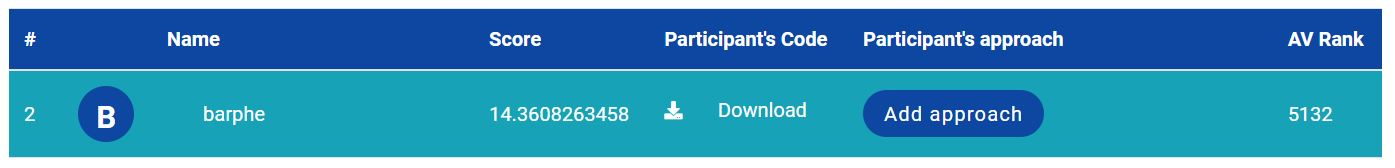

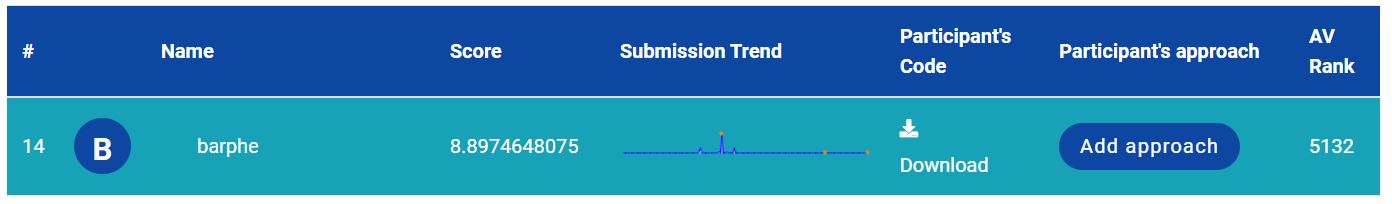

**Competition Link:-** 

https://datahack.analyticsvidhya.com/contest/the-sledge-hack/?utm_source=homepage&utm_medium=footer#LeaderBoard

**Rank Scored:-**

a) **02** out of **1073** registered participants (Private Leaderboard)

b) **14** out of **1073** registered participants (Public Leaderboard)